In [234]:
from functools import lru_cache

import matplotlib.pyplot as plt
import numpy as np
from  IPython import display

from my_settings import *
from sympy import symbols, Eq, solve
import pandas as pd


In [125]:
def guess_c_finite(sequence):
    def generate_equation(coeffs, n, order, sequence):
        eq = sequence[n] + sum(coeffs[i] * sequence[n - i - 1] for i in range(order))
        return Eq(eq, 0)

    order = 1
    while order < len(sequence) - 2:
        coeffs = symbols(f'c:{order}')
        
        equations = [generate_equation(coeffs, n, order, sequence) for n in range(order, len(sequence))]
        
        solution = solve(equations, coeffs)
        if solution:
            return solution
        
        order += 1

    return None 


In [118]:
def given_cfinite_seq(n):
    a = [0,-14,-121,-548,-1915]
    
    if n < len(a):
        return a[n]
    else:
        while len(a) <= n:
            a += [(12*a[-1] - 57*a[-2]  + 134*a[-3]  -156*a[-4]  +72 *a[-5] )]
    return a[n]

# observing sequence
for i in range(0,6):
    print(f"(c1 + {i}*c2 + {i**2} * c3 + {i**3}*c4)*2^{i} + (c5*c6*{i})*3^{i} =  {given_cfinite_seq(i)} ")
    



(c1 + 0*c2 + 0 * c3 + 0*c4)*2^0 + (c5*c6*0)*3^0 =  0 
(c1 + 1*c2 + 1 * c3 + 1*c4)*2^1 + (c5*c6*1)*3^1 =  -14 
(c1 + 2*c2 + 4 * c3 + 8*c4)*2^2 + (c5*c6*2)*3^2 =  -121 
(c1 + 3*c2 + 9 * c3 + 27*c4)*2^3 + (c5*c6*3)*3^3 =  -548 
(c1 + 4*c2 + 16 * c3 + 64*c4)*2^4 + (c5*c6*4)*3^4 =  -1915 
(c1 + 5*c2 + 25 * c3 + 125*c4)*2^5 + (c5*c6*5)*3^5 =  -5774 


a.)

In [222]:
c1 = symbols('c1')
c2 = symbols('c2')
c3 = symbols('c3')
c4 = symbols('c4')
c5 = symbols('c5')
c6 = symbols('c6')

eqs = []
for i in range(0,6):
    eqs += [(Eq(2 ** i * (c1 + i*c2 + i**2* c3 + i**3 * c4) + 3 ** i * (c5 + c6*i), given_cfinite_seq(i)))]
sol = solve(eqs, (c1, c2, c3, c4, c5, c6))

print(sol)

print(f"= 2^n({sol[c1]} + n*{sol[c2]} + n^2* {sol[c3]} + n^3 * {sol[c4]}) + 3^n * ({sol[c5]} + {sol[c6]}*n)")

{c1: -1, c2: 0, c3: -9, c4: 0, c5: 1, c6: 1}
= 2^n(-1 + n*0 + n^2* -9 + n^3 * 0) + 3^n * (1 + 1*n)


In [120]:
close_form = lambda n: 2**n*(sol[c1] + n*sol[c2] + n**2* sol[c3] + n**3 * sol[c4]) + 3**n * (sol[c5] + sol[c6]*n)

data = []

for i in range(1, 12):
    data.append({"Index": i, 
                 "Close Form": close_form(i), 
                 "Cfinite": given_cfinite_seq(i)})  

df = pd.DataFrame(data)
df.set_index('Index', inplace=True)
df


,Close Form,Cfinite
Index,,
1,-14,-14
2,-121,-121
3,-548,-548
4,-1915,-1915
5,-5774,-5774
6,-15697,-15697
7,-39080,-39080
8,-88663,-88663
9,-176930,-176930


b)

In [247]:
def given_cfinite_seq_2(n):
    a = [0,-14,-121,-548,-1915, -5774] # d = 6
    if n < len(a):
        return a[n]
    else:
        while len(a) <= n:
            a.append(14*a[-1] - 81*a[-2]  +248*a[-3]  -424*a[-4]  +384 *a[-5] - 144*a[-6] )
    return a[n]

data = []

for i in range(0, 18):
    data.append({"n": i, 
                 "seq d=5": given_cfinite_seq(i), 
                 "seq d=6": given_cfinite_seq_2(i)})  

df = pd.DataFrame(data)
df.set_index('n', inplace=True)

print("seq d=5 guess_c_finite() = ",guess_c_finite(df["seq d=5"].values))
print("seq d=6 guess_c_finite() = ",guess_c_finite(df["seq d=6"].values))



print(f"= 2^n({sol[c1]} + n*{sol[c2]} + n^2* {sol[c3]} + n^3 * {sol[c4]}) + 3^n * ({sol[c5]} + {sol[c6]}*n)")
df


seq d=5 guess_c_finite() =  {c0: -12, c1: 57, c2: -134, c3: 156, c4: -72}
seq d=6 guess_c_finite() =  {c0: -12, c1: 57, c2: -134, c3: 156, c4: -72}
= 2^n(-1 + n*0 + n^2* -9 + n^3 * 0) + 3^n * (1 + 1*n)


,seq d=5,seq d=6
n,,
0,0,0
1,-14,-14
2,-121,-121
3,-548,-548
4,-1915,-1915
5,-5774,-5774
6,-15697,-15697
7,-39080,-39080
8,-88663,-88663


{c1: -1, c2: 0, c3: -9, c4: 0, c5: 1, c6: 1}
= 2^n(-1 + n*0 + n^2* -9 + n^3 * 0) + 3^n * (1 + 1*n)


In [259]:
f = np.vectorize(given_cfinite_seq_2)
ns = np.arange(0, 18, dtype=np.int64)
ys = f(ns)

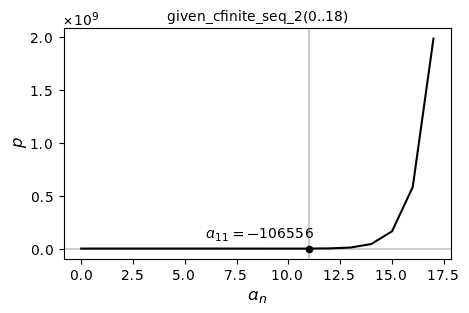

In [266]:
plt.figure(figsize=(5, 3))
plt.plot( color='k', alpha=0.8)

plt.title("given_cfinite_seq_2(0..18)", fontsize=10)
plt.plot(ns, ys, color='k')
plt.xlabel("$a_n$", fontsize=12)

first_pos = np.argmax(ys > 0) -1
plt.axvline(first_pos, color='k', alpha=0.2)
plt.axhline(ys[first_pos], color='k', alpha=0.2)
plt.scatter(first_pos, ys[first_pos], s=20, color='k', marker='o')
plt.annotate(f"$a_{{{first_pos}}} = {{{ys[first_pos]}}} $",(first_pos -5, ys[first_pos]+ 200000000*0.5), fontsize=10)


plt.ylabel("$p$", fontsize=12)
plt.savefig("../drawings/p5.pdf")

11